# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_STRAIGHT_HOLE/CORNER_CRACK_BH_THROUGH_THICKNESS_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,200.000,0.1,1.05,0.50,1.0,0.053251,8.017986,5.083657,10.664907
1,0.0,200.000,0.1,1.05,0.50,1.0,0.062342,8.093528,5.107086,11.217668
2,0.0,200.000,0.1,1.05,0.50,1.0,0.071433,8.190579,5.142988,9.632060
3,0.0,200.000,0.1,1.05,0.50,1.0,0.080523,8.300711,5.185074,9.732275
4,0.0,200.000,0.1,1.05,0.50,1.0,0.089614,8.423436,5.232889,12.510558
...,...,...,...,...,...,...,...,...,...,...
461691,5423.0,133.333,10.0,6.00,0.75,1.0,0.127987,7.561296,-2.802499,173.566549
461692,5423.0,133.333,10.0,6.00,0.75,1.0,0.128731,7.559203,-2.849904,173.457928
461693,5423.0,133.333,10.0,6.00,0.75,1.0,0.129475,7.557050,-2.897324,173.341666
461694,5423.0,133.333,10.0,6.00,0.75,1.0,0.130219,7.554833,-2.944767,173.218730


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

3607


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  10.      12.5     20.      25.      33.333   40.      50.      57.143
   75.019   80.     125.     133.333  175.009  200.     300.3    500.
  700.28   800.     900.901 1000.   ]
Different a/c values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.5
  0.667   0.75    0.8     1.      1.25    1.333   1.5     2.      3.
  4.      5.      6.      7.      8.      9.     10.    ]
Different a/t values:  [1.05 1.15 1.25 1.5  1.75 2.   2.5  3.   4.   5.   6.   8.  ]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.2     0.333   0.5     0.5714  0.75
  0.8     1.25    1.333   1.75    2.      2.5     3.      4.      5.
  8.     10.    ]
Different phi values:  [0.03585458 0.03627687 0.03649763 ... 1.20776832 1.20776847 1.20776863]


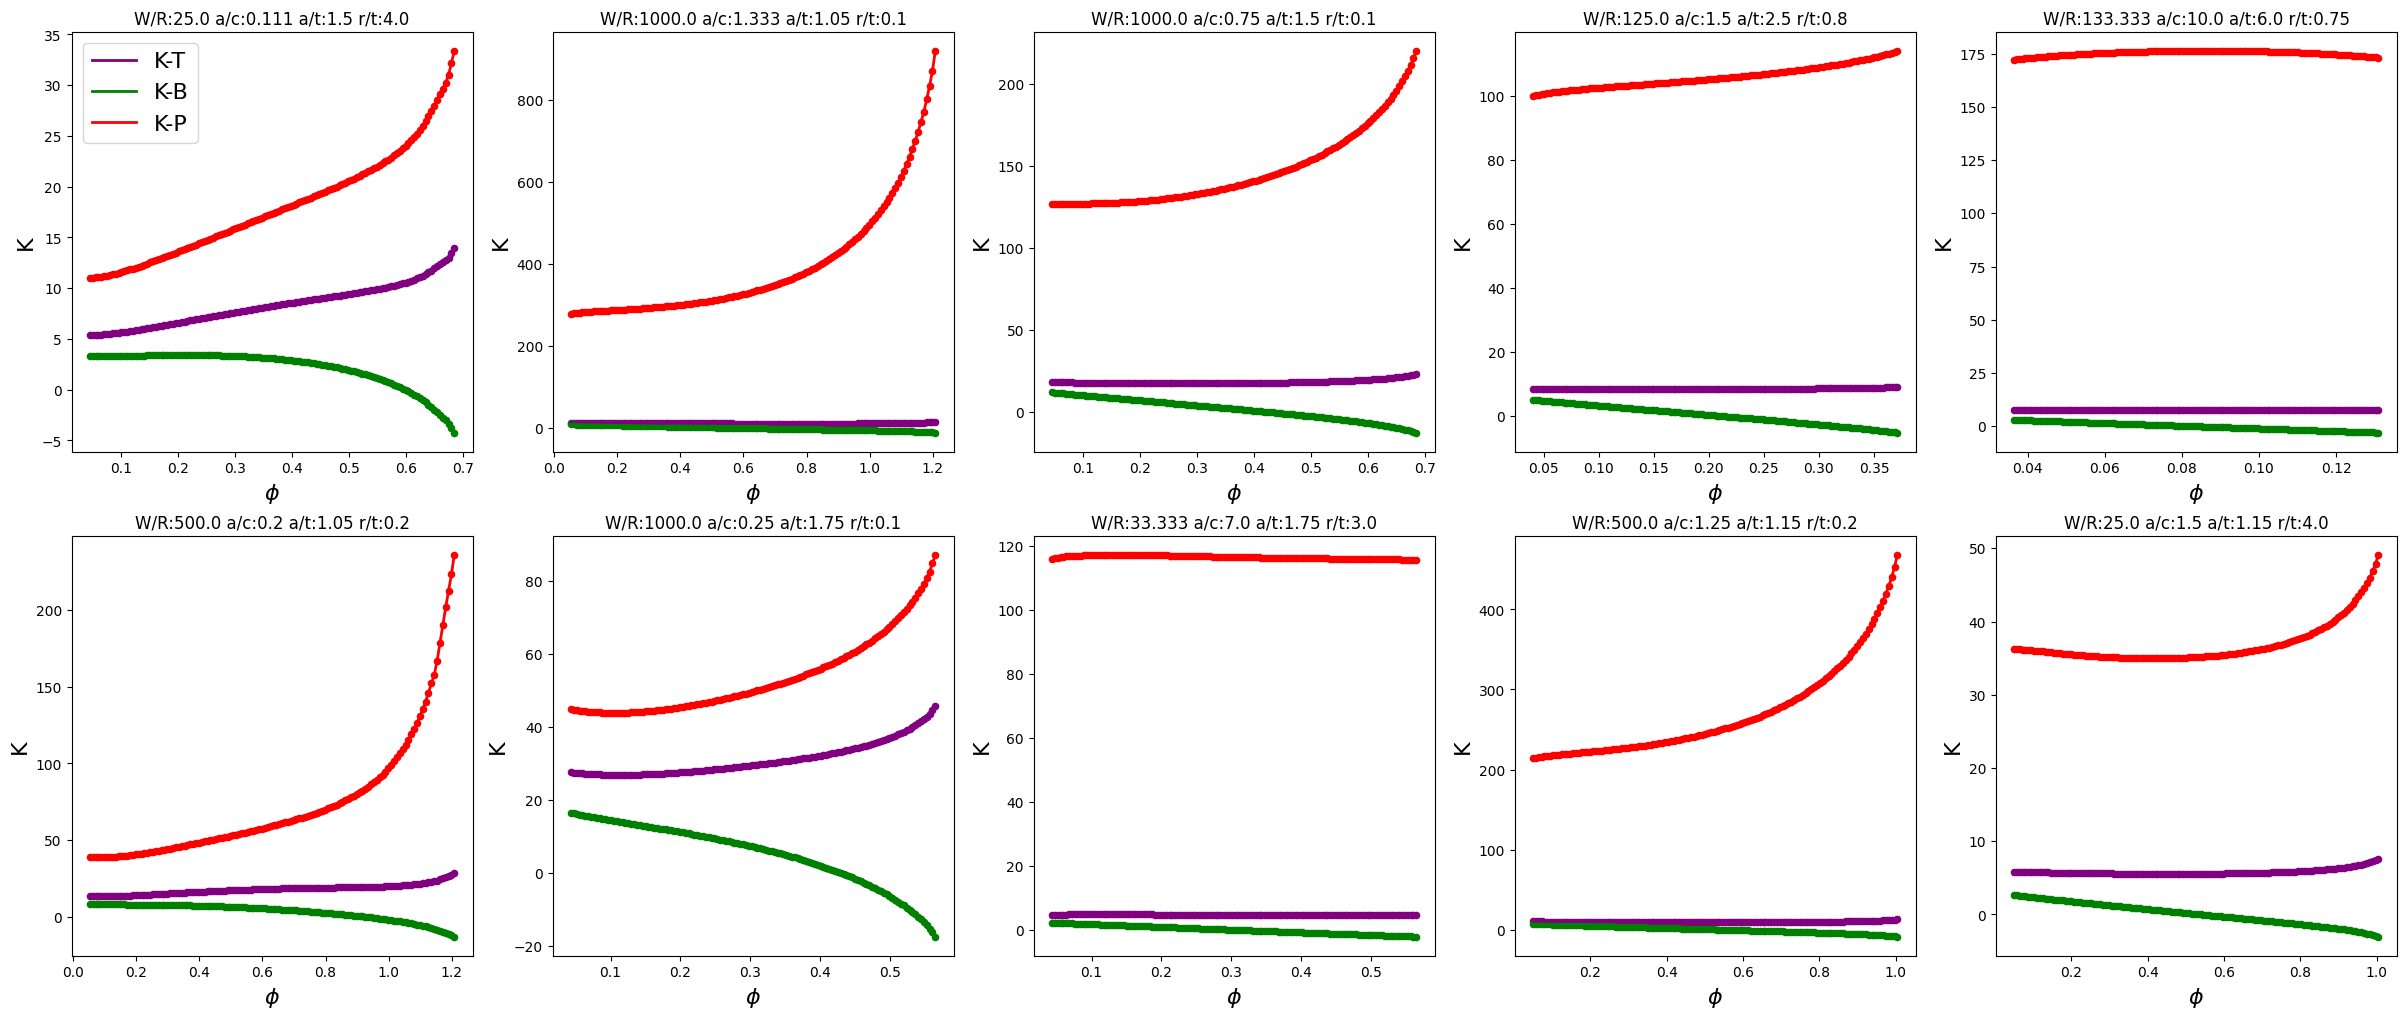

In [8]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(2)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [9]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_STRAIGHT_HOLE/CORNER_CRACK_BH_THROUGH_THICKNESS_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,200.000,0.1,1.15,0.50,1.0,0.050077,8.938764,5.602247,14.664594
1,1.0,200.000,0.1,1.15,0.50,1.0,0.057591,8.995716,5.614350,9.698707
2,1.0,200.000,0.1,1.15,0.50,1.0,0.065104,9.069096,5.634621,9.903749
3,1.0,200.000,0.1,1.15,0.50,1.0,0.072618,9.157998,5.662964,14.675771
4,1.0,200.000,0.1,1.15,0.50,1.0,0.080131,9.259129,5.697964,12.532271
...,...,...,...,...,...,...,...,...,...,...
153979,5417.0,133.333,10.0,1.75,0.75,1.0,0.548598,6.213748,-3.418036,190.092233
153980,5417.0,133.333,10.0,1.75,0.75,1.0,0.552706,6.207076,-3.464890,189.664216
153981,5417.0,133.333,10.0,1.75,0.75,1.0,0.556815,6.199627,-3.511807,189.249271
153982,5417.0,133.333,10.0,1.75,0.75,1.0,0.560924,6.191451,-3.558536,188.817020


In [10]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

1203


In [11]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  10.      12.5     20.      25.      33.333   40.      50.      57.143
   75.019   80.     125.     133.333  175.009  200.     300.3    500.
  700.28   800.     900.901 1000.   ]
Different a/c values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.5
  0.667   0.75    0.8     1.      1.25    1.333   1.5     2.      3.
  4.      5.      6.      7.      8.      9.     10.    ]
Different a/t values:  [1.05 1.15 1.25 1.5  1.75 2.   2.5  3.   4.   5.   6.   8.  ]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.2     0.333   0.5     0.5714  0.75
  0.8     1.25    1.333   1.75    2.      2.5     3.      4.      5.
  8.     10.    ]
Different phi values:  [0.03585458 0.03595305 0.03627687 ... 1.20776847 1.20776863 1.2125016 ]


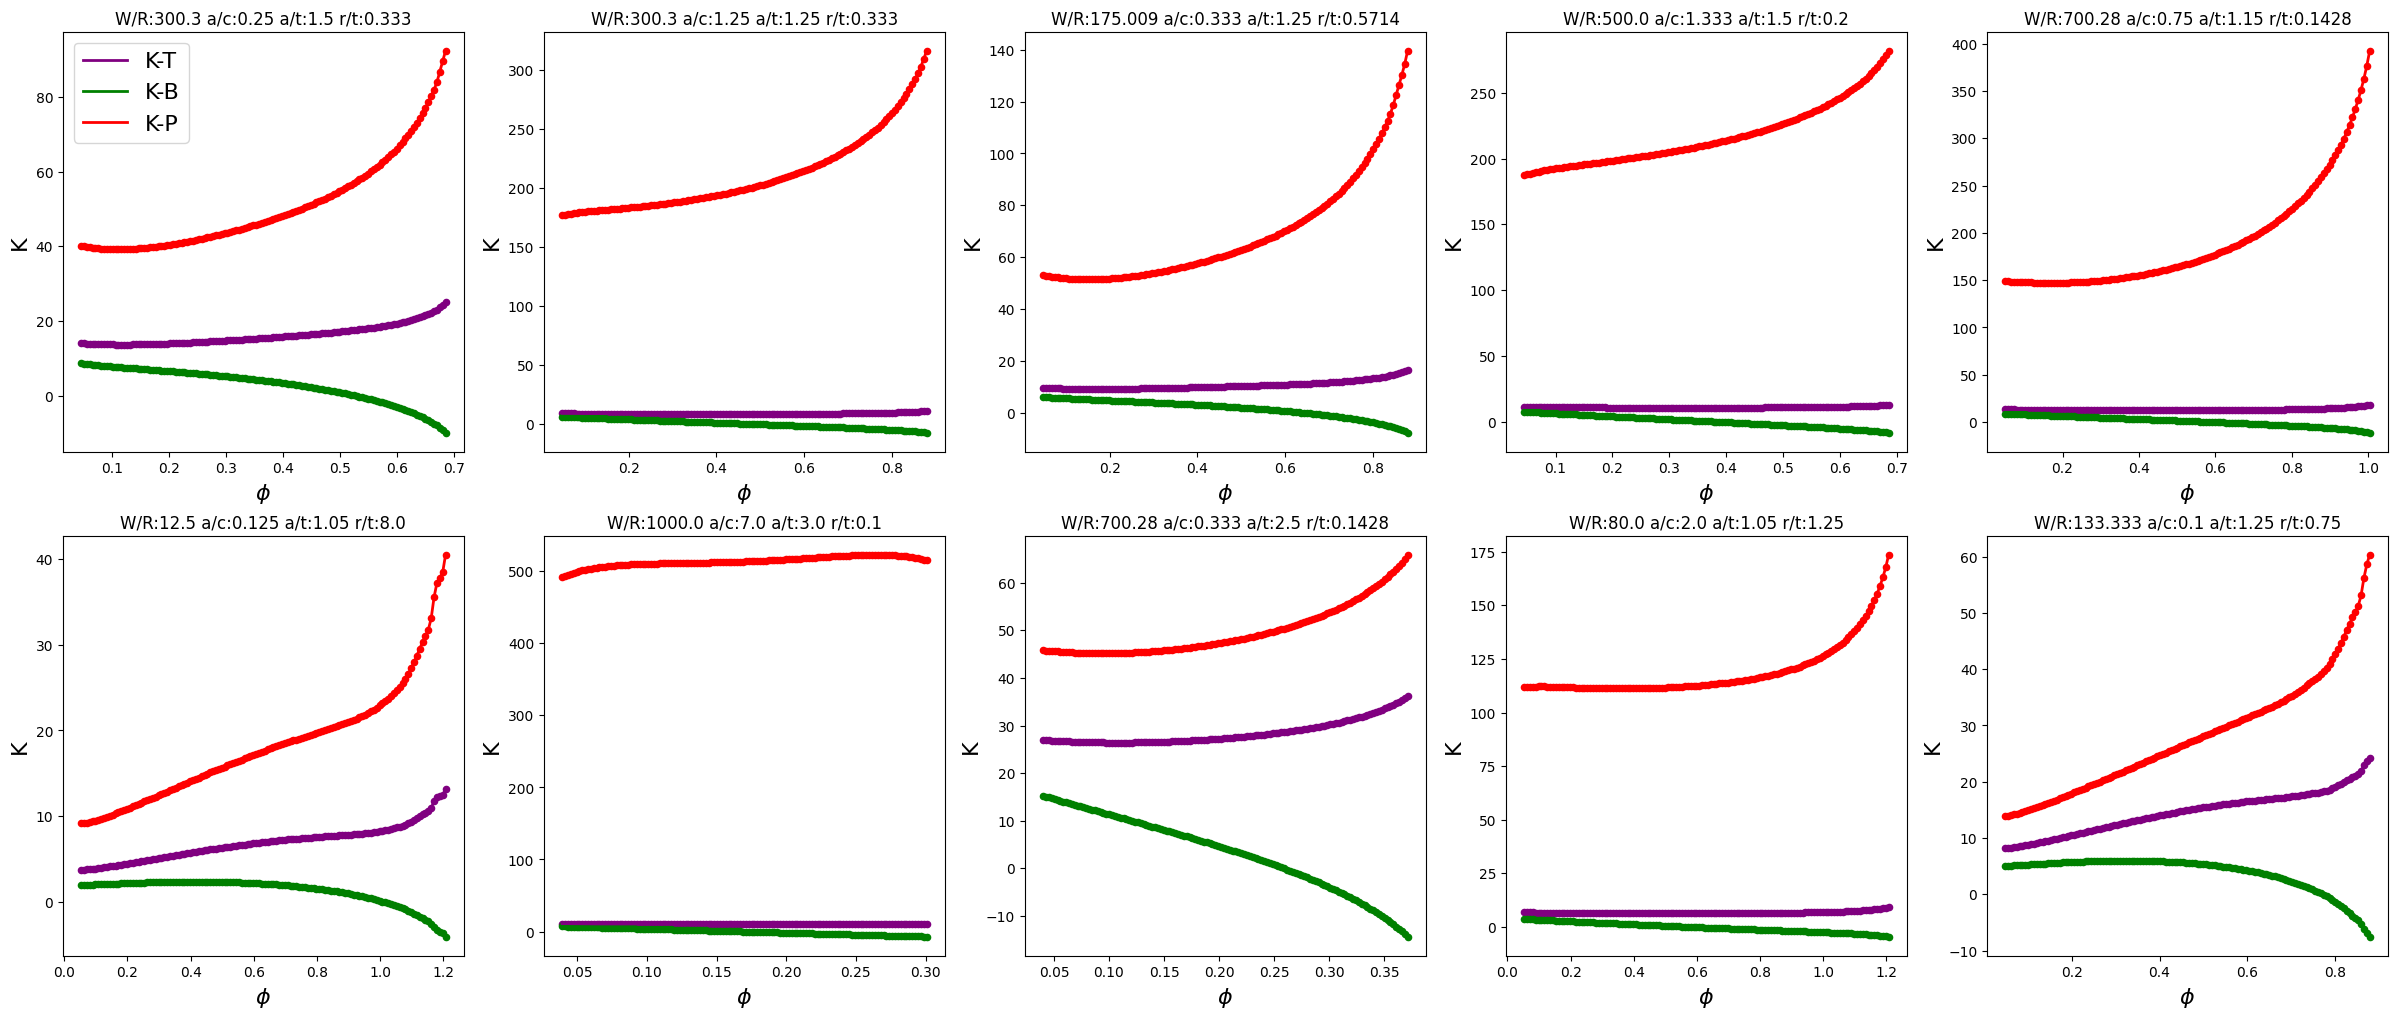

In [16]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(3)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()